In [1]:
import model_mobile_vig
import torch
from pathlib import Path


model_path = Path("./models/100_epochs.pth")
checkpoint = torch.load(model_path)
state_dict = checkpoint["model_state_dict"]

class_names = ["downdog", "goddess", "plank", "tree", "warrior2"]

model = model_mobile_vig.mobilevig_ti(num_classes=len(class_names))
model.load_state_dict(state_dict=state_dict)

<All keys matched successfully>

In [2]:
from torchvision.transforms import v2

preprocess = v2.Compose(
    [
        v2.ToImage(),
        v2.Resize((224, 224)),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

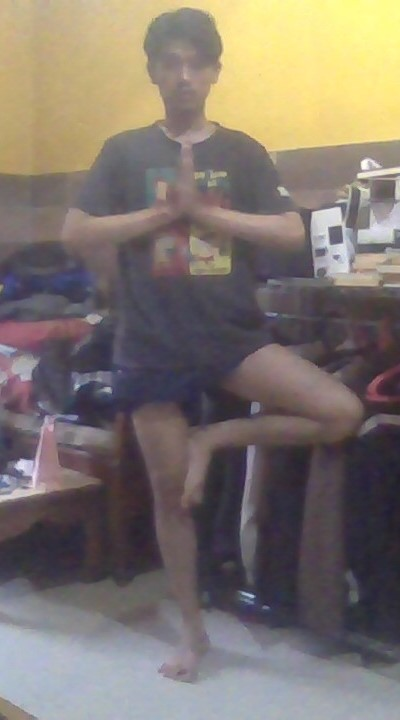

In [6]:
from PIL import Image

custom_image_path = Path("./data/custom-data/downdogtest.jpeg")
img = Image.open(custom_image_path)
img


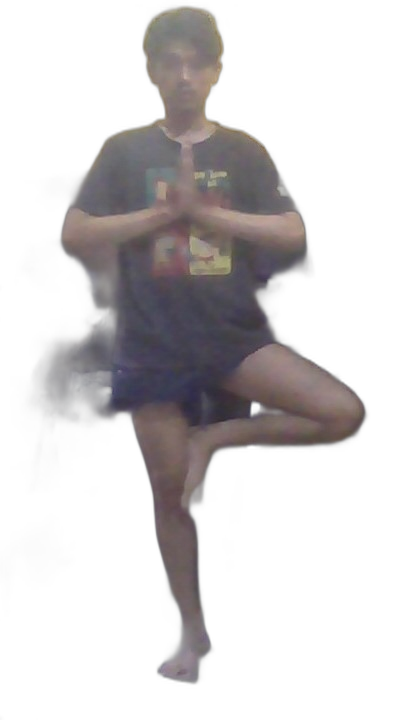

In [8]:
# from rembg import remove

# img = remove(input_img)
# width, height = img.size # type: ignore
# background = Image.new("RGBA", (width, height), (255, 255, 255))
# background.paste(img, (0, 0), img) # type: ignore
# img = background.convert("RGB")
# img


(-0.5, 399.5, 719.5, -0.5)

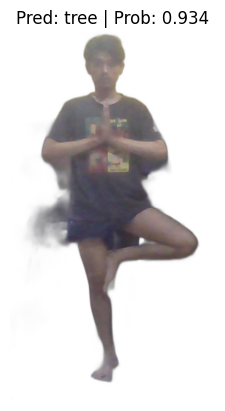

In [9]:
import matplotlib.pyplot as plt

model.to("cpu")

model.eval()
with torch.inference_mode():
    transformed_image = preprocess(img).unsqueeze(dim=0).to("cpu")
    target_image_pred = model(transformed_image)

target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
plt.figure()
plt.imshow(img)
plt.title(
    f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
)
plt.axis(False)